--- Testing for 2-bit integers ---
Truncated:
  Average Absolute Error: 0.99
  Average Relative Error: 14.19%
  Average Execution Time: 6.48 µs
Reduced Carry:
  Average Absolute Error: 0.49
  Average Relative Error: 7.07%
  Average Execution Time: 7.22 µs
Simplified:
  Average Absolute Error: 0.86
  Average Relative Error: 12.35%
  Average Execution Time: 5.90 µs
Stochastic:
  Average Absolute Error: 1.26
  Average Relative Error: 17.97%
  Average Execution Time: 11.67 µs
--- Testing for 4-bit integers ---
Truncated:
  Average Absolute Error: 5.26
  Average Relative Error: 16.97%
  Average Execution Time: 18.96 µs
Reduced Carry:
  Average Absolute Error: 3.87
  Average Relative Error: 12.47%
  Average Execution Time: 18.60 µs
Simplified:
  Average Absolute Error: 4.82
  Average Relative Error: 15.55%
  Average Execution Time: 7.67 µs
Stochastic:
  Average Absolute Error: 4.80
  Average Relative Error: 15.47%
  Average Execution Time: 21.70 µs
--- Testing for 8-bit integers ---
Truncate

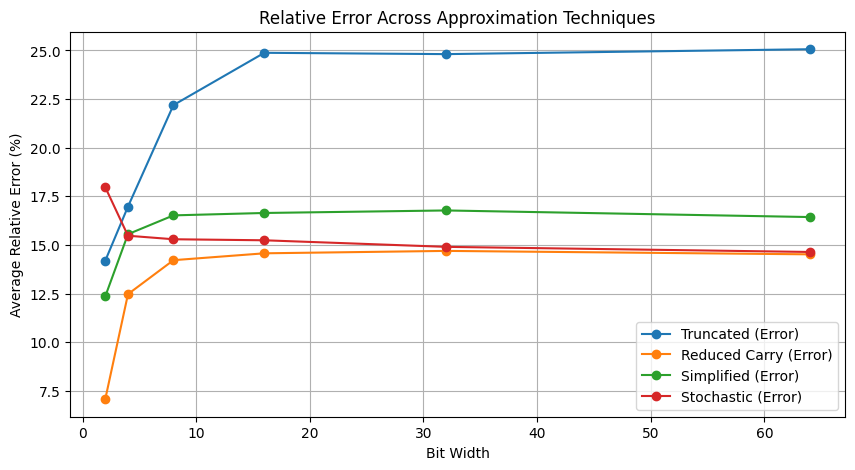

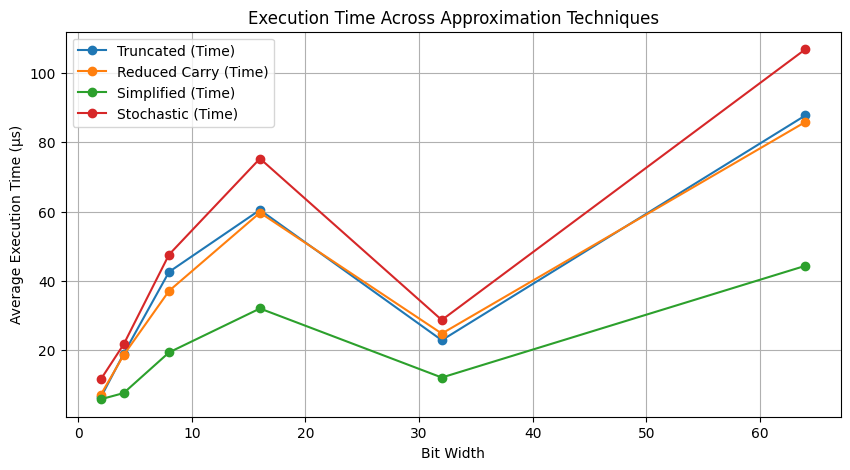

In [ ]:
import time
import random
import matplotlib.pyplot as plt

def full_adder(a, b, carry_in):
    # Calculate sum and carry-out
    sum_bit = a ^ b ^ carry_in  # XOR for sum
    carry_out = (a & b) | (carry_in & (a ^ b))  # Carry logic
    return sum_bit, carry_out

# ripple carry using full-adder
def multi_bit_adder(a, b, bit_width):
    carry = 0
    result = 0

    for i in range(bit_width):
        # Extract the i-th bit of a and b
        bit_a = (a >> i) & 1
        bit_b = (b >> i) & 1

        # Compute the sum and carry for this bit
        sum_bit, carry = full_adder(bit_a, bit_b, carry)

        # Add the sum bit to the result
        result |= (sum_bit << i)

    return result

# bit truncation
def truncated_adder(a, b, bit_width):
    truncation_bits = bit_width // 2  # Truncate half the bits
    truncation_mask = (1 << (bit_width - truncation_bits)) - 1
    a_truncated = a & truncation_mask
    b_truncated = b & truncation_mask
    return multi_bit_adder(a_truncated, b_truncated, bit_width)

# reduced carry propagation
def reduced_carry_adder(a, b, bit_width):
    carry_limit = bit_width // 2  # Limit carry propagation to half the bits
    carry = 0
    result = 0

    for i in range(bit_width):
        if i >= carry_limit:
            carry = 0  # Ignore carry beyond the limit
        bit_a = (a >> i) & 1
        bit_b = (b >> i) & 1
        sum_bit, carry = full_adder(bit_a, bit_b, carry)
        result |= (sum_bit << i)

    return result

# stochastic
def stochastic_adder(a, b, bit_width):
    error_rate = 1 / (bit_width / 2)  # Adjust error rate based on bit width
    result = 0

    for i in range(bit_width):
        if random.random() < error_rate:
            sum_bit = random.randint(0, 1)  # Introduce error
        else:
            bit_a = (a >> i) & 1
            bit_b = (b >> i) & 1
            sum_bit, _ = full_adder(bit_a, bit_b, 0)
        result |= (sum_bit << i)

    return result

# simplified logic gates
def simplified_logic_adder(a, b, bit_width):
    result = 0

    for i in range(bit_width):
        bit_a = (a >> i) & 1
        bit_b = (b >> i) & 1

        # Use OR gate approximation for the sum
        sum_bit = bit_a | bit_b
        result |= (sum_bit << i)

    return result

# Generate random test inputs
def generate_test_cases(bit_width, num_cases=10000):
    return [(random.randint(0, (1 << bit_width) - 1), random.randint(0, (1 << bit_width) - 1)) for _ in range(num_cases)]

def calculate_errors(exact, approx, bit_width):
    max_possible_sum = (1 << bit_width) * 2 - 1  # Max sum for given bit width
    absolute_error = abs(exact - approx)
    relative_error = absolute_error / max_possible_sum if max_possible_sum != 0 else 0
    percentage_error = relative_error * 100
    return absolute_error, relative_error, percentage_error

# Breakdown results for specific bit widths
def breakdown_results(test_cases, bit_width):
    results = {}
    for method in ["Truncated", "Reduced Carry", "Simplified", "Stochastic"]:
        results[method] = {"abs_errors": [], "rel_errors": [], "exec_times": []}

    for a, b in test_cases:
        exact = multi_bit_adder(a, b, bit_width)

        # Measure time and calculate errors for each technique
        start = time.time()
        truncated = truncated_adder(a, b, bit_width)
        results["Truncated"]["exec_times"].append(time.time() - start)
        abs_err, rel_err, _ = calculate_errors(exact, truncated, bit_width)
        results["Truncated"]["abs_errors"].append(abs_err)
        results["Truncated"]["rel_errors"].append(rel_err)

        start = time.time()
        reduced_carry = reduced_carry_adder(a, b, bit_width)
        results["Reduced Carry"]["exec_times"].append(time.time() - start)
        abs_err, rel_err, _ = calculate_errors(exact, reduced_carry, bit_width)
        results["Reduced Carry"]["abs_errors"].append(abs_err)
        results["Reduced Carry"]["rel_errors"].append(rel_err)

        start = time.time()
        simplified = simplified_logic_adder(a, b, bit_width)
        results["Simplified"]["exec_times"].append(time.time() - start)
        abs_err, rel_err, _ = calculate_errors(exact, simplified, bit_width)
        results["Simplified"]["abs_errors"].append(abs_err)
        results["Simplified"]["rel_errors"].append(rel_err)

        start = time.time()
        stochastic = stochastic_adder(a, b, bit_width)
        results["Stochastic"]["exec_times"].append(time.time() - start)
        abs_err, rel_err, _ = calculate_errors(exact, stochastic, bit_width)
        results["Stochastic"]["abs_errors"].append(abs_err)
        results["Stochastic"]["rel_errors"].append(rel_err)

    # Calculate averages for each method
    for method in results:
        results[method]["avg_abs_error"] = sum(results[method]["abs_errors"]) / len(results[method]["abs_errors"])
        results[method]["avg_rel_error"] = sum(results[method]["rel_errors"]) / len(results[method]["rel_errors"])
        results[method]["avg_exec_time"] = sum(results[method]["exec_times"]) / len(results[method]["exec_times"])

    return results


if __name__ == "__main__":
    # Evaluate and compare results
    bit_widths = [2, 4, 8, 16, 32, 64]
    errors = {
        "Truncated": [],
        "Reduced Carry": [],
        "Simplified": [],
        "Stochastic": []
    }
    total_errors = {
        "Truncated": 0,
        "Reduced Carry": 0,
        "Simplified": 0,
        "Stochastic": 0
    }
    error_data = {"Truncated": [], "Reduced Carry": [], "Simplified": [], "Stochastic": []}
    time_data = {"Truncated": [], "Reduced Carry": [], "Simplified": [], "Stochastic": []}

    for bit_width in bit_widths:
        print(f"--- Testing for {bit_width}-bit integers ---")
        test_cases = generate_test_cases(bit_width)

        for a, b in test_cases:
            exact = multi_bit_adder(a, b, bit_width)
            # Approximate results
            truncated = truncated_adder(a, b, bit_width)
            reduced_carry = reduced_carry_adder(a, b, bit_width)
            simplified = simplified_logic_adder(a, b, bit_width)
            stochastic = stochastic_adder(a, b, bit_width)
            # Calculate errors
            abs_err_trunc, rel_err_trunc, _ = calculate_errors(exact, truncated, bit_width)
            abs_err_rc, rel_err_rc, _ = calculate_errors(exact, reduced_carry, bit_width)
            abs_err_simp, rel_err_simp, _ = calculate_errors(exact, simplified, bit_width)
            abs_err_stoch, rel_err_stoch, _ = calculate_errors(exact, stochastic, bit_width)
            # Accumulate errors
            total_errors["Truncated"] += rel_err_trunc
            total_errors["Reduced Carry"] += rel_err_rc
            total_errors["Simplified"] += rel_err_simp
            total_errors["Stochastic"] += rel_err_stoch
        # Calculate average relative error
        num_cases = len(test_cases)
        errors["Truncated"].append(total_errors["Truncated"] / num_cases)
        errors["Reduced Carry"].append(total_errors["Reduced Carry"] / num_cases)
        errors["Simplified"].append(total_errors["Simplified"] / num_cases)
        errors["Stochastic"].append(total_errors["Stochastic"] / num_cases)

        results = breakdown_results(test_cases, bit_width)

        for method, data in results.items():
            print(f"{method}:")
            print(f"  Average Absolute Error: {data['avg_abs_error']:.2f}")
            print(f"  Average Relative Error: {data['avg_rel_error'] * 100:.2f}%")
            print(f"  Average Execution Time: {data['avg_exec_time'] * 1e6:.2f} µs")
            error_data[method].append(results[method]["avg_rel_error"] * 100)
            time_data[method].append(results[method]["avg_exec_time"] * 1e6)

    # plt.figure(figsize=(10, 6))
    # plt.plot(bit_widths, [e * 100 for e in errors["Truncated"]], label="Truncated")
    # plt.plot(bit_widths, [e * 100 for e in errors["Reduced Carry"]], label="Reduced Carry")
    # plt.plot(bit_widths, [e * 100 for e in errors["Simplified"]], label="Simplified Logic")
    # plt.plot(bit_widths, [e * 100 for e in errors["Stochastic"]], label="Stochastic")

    # plt.xlabel("Bit Width")
    # plt.ylabel("Average Relative Error (%)")
    # plt.title("Average Relative Error vs. Bit Width")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Plot Relative Error
    plt.figure(figsize=(10, 5))
    for method, errors2 in error_data.items():
        plt.plot(bit_widths, errors2, label=f"{method} (Error)", marker='o')

    plt.xlabel("Bit Width")
    plt.ylabel("Average Relative Error (%)")
    plt.title("Relative Error Across Approximation Techniques")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Execution Time
    plt.figure(figsize=(10, 5))
    for method, times in time_data.items():
        plt.plot(bit_widths, times, label=f"{method} (Time)", marker='o')

    plt.xlabel("Bit Width")
    plt.ylabel("Average Execution Time (µs)")
    plt.title("Execution Time Across Approximation Techniques")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
!pip install pymtl3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.9/474.9 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.8 MB/s eta 0:00:00


In [25]:
from pymtl3 import *
import random

class FullAdder(Component):
    def construct(s):
        s.a = InPort()
        s.b = InPort()
        s.cin = InPort()
        s.sum = OutPort()
        s.cout = OutPort()

        @update
        def comb_logic():
            s.sum @= s.a ^ s.b ^ s.cin
            s.cout @= (s.a & s.b) | (s.cin & (s.a ^ s.b))

class RippleCarryAdder(Component):
    def construct(s, nbits=8):
        BitsN = mk_bits(nbits)  # Define dynamic bit type

        # Define ports
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.cin = InPort(Bits1)
        s.sum = OutPort(BitsN)
        s.cout = OutPort(Bits1)

        # Carry chain
        s.carry = [Wire(Bits1) for _ in range(nbits + 1)]
        s.carry[0] //= s.cin

        # Instantiate full adders
        s.adders = [FullAdder() for _ in range(nbits)]
        for i in range(nbits):
            s.adders[i].a //= s.a[i]
            s.adders[i].b //= s.b[i]
            s.adders[i].cin //= s.carry[i]
            s.adders[i].sum //= s.sum[i]
            s.adders[i].cout //= s.carry[i + 1]

        # Connect the final carry-out
        s.cout //= s.carry[nbits]

class TruncatedAdder(Component):
    def construct(s, nbits=8, truncate_bits=4):
        BitsN = mk_bits(nbits)

        # Define ports
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.sum = OutPort(BitsN)

        @update
        def comb_logic():
            s.sum @= (s.a >> truncate_bits) + (s.b >> truncate_bits)  # Add truncated MSBs
            s.sum @= truncate_bits  # Mask LSBs

class ReducedCarryAdder(Component):
    def construct(s, nbits=8, carry_limit=4):
        BitsN = mk_bits(nbits)
        BitsC = mk_bits(carry_limit)

        # Define ports
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.sum = OutPort(BitsN)

        # Define partial wires for truncated inputs
        s.a_partial = Wire(BitsC)
        s.b_partial = Wire(BitsC)
        s.partial_sum = Wire(BitsC)
        s.partial_carry = Wire(Bits1)

        # Connect truncated inputs
        @update
        def assign_partial_inputs():
            s.a_partial @= s.a[:carry_limit]
            s.b_partial @= s.b[:carry_limit]

        # Instantiate the ripple carry adder for truncated bits
        s.ripple = RippleCarryAdder(carry_limit)
        s.ripple.a //= s.a_partial
        s.ripple.b //= s.b_partial
        s.ripple.cin //= Bits1(0)
        s.ripple.sum //= s.partial_sum
        s.ripple.cout //= s.partial_carry

        # Combine partial and upper bits
        @update
        def combine_logic():
            s.sum[:carry_limit] @= s.partial_sum  # Use partial sum
            s.sum[carry_limit:] @= s.a[carry_limit:] ^ s.b[carry_limit:]  # XOR upper bits directly

class StochasticAdder(Component):
    def construct(s, nbits=8):
        BitsN = mk_bits(nbits)

        # Define ports
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.sum = OutPort(BitsN)

        @update
        def comb_logic():
            random_mask = BitsN(random.getrandbits(nbits))  # Random mask
            s.sum @= (s.a ^ s.b) ^ random_mask  # XOR result with randomness

class SimplifiedLogicAdder(Component):
    def construct(s, nbits=8):
        BitsN = mk_bits(nbits)

        # Define ports
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.sum = OutPort(BitsN)

        @update
        def comb_logic():
            s.sum @= s.a ^ s.b  # XOR the inputs

In [26]:
from pymtl3 import *
from pymtl3.passes.backends.verilog import *

class AdderTestbench(Component):
    def construct(s):
        BitsN = mk_bits(8)

        s.a = InPort(BitsN)
        s.b = InPort(BitsN)

        s.exact = RippleCarryAdder(8)
        s.truncated = TruncatedAdder(8, 4)
        s.simplified = SimplifiedLogicAdder(8)
        s.reduced = ReducedCarryAdder(8, 4)
        s.stochastic = StochasticAdder(8)

        s.exact.a //= s.a
        s.exact.b //= s.b
        s.exact.cin //= Bits1(0)  # Connect cin explicitly

        s.truncated.a //= s.a
        s.truncated.b //= s.b

        s.simplified.a //= s.a
        s.simplified.b //= s.b

        s.reduced.a //= s.a
        s.reduced.b //= s.b

        s.stochastic.a //= s.a
        s.stochastic.b //= s.b

        @update
        def display_outputs():
            print(f"A: {s.a}, B: {s.b}")
            print(f"Exact Sum:       {s.exact.sum}")
            print(f"Truncated Sum:   {s.truncated.sum}")
            print(f"Simplified Sum:  {s.simplified.sum}")
            print(f"Reduced Sum:     {s.reduced.sum}")
            print(f"Stochastic Sum:  {s.stochastic.sum}")

            abs_error_truncated = abs(int(s.exact.sum) - int(s.truncated.sum))
            rel_error_truncated = abs_error_truncated / max(1, int(s.exact.sum))

            abs_error_simplified = abs(int(s.exact.sum) - int(s.simplified.sum))
            rel_error_simplified = abs_error_simplified / max(1, int(s.exact.sum))

            abs_error_reduced = abs(int(s.exact.sum) - int(s.reduced.sum))
            rel_error_reduced = abs_error_reduced / max(1, int(s.exact.sum))

            abs_error_stochastic = abs(int(s.exact.sum) - int(s.stochastic.sum))
            rel_error_stochastic = abs_error_stochastic / max(1, int(s.exact.sum))

            print(f"Inputs: A = {s.a}, B = {s.b}")
            print(f"Truncated Adder - Absolute Error: {abs_error_truncated}, Relative Error: {rel_error_truncated:.4f}")
            print(f"Simplified Logic Adder - Absolute Error: {abs_error_simplified}, Relative Error: {rel_error_simplified:.4f}")
            print(f"Reduced Carry Adder - Absolute Error: {abs_error_reduced}, Relative Error: {rel_error_reduced:.4f}")
            print(f"Stochastic Adder - Absolute Error: {abs_error_stochastic}, Relative Error: {rel_error_stochastic:.4f}")

# Instantiate and run the testbench
def run_testbench():
    Bits8 = mk_bits(8)  # Define an 8-bit type

    tb = AdderTestbench()
    tb.apply(DefaultPassGroup(textwave=True))
    tb.sim_reset()

    for i in range(5):
        tb.a @= Bits8(i)  # Properly initialize with Bits8
        tb.b @= Bits8(~i & 0xFF)  # Ensure it's within 8 bits
        tb.sim_tick()

run_testbench()


A: 00, B: 00
Exact Sum:       00
Truncated Sum:   04
Simplified Sum:  00
Reduced Sum:     00
Stochastic Sum:  5d
Inputs: A = 00, B = 00
Truncated Adder - Absolute Error: 4, Relative Error: 4.0000
Simplified Logic Adder - Absolute Error: 0, Relative Error: 0.0000
Reduced Carry Adder - Absolute Error: 0, Relative Error: 0.0000
Stochastic Adder - Absolute Error: 93, Relative Error: 93.0000
A: 00, B: 00
Exact Sum:       00
Truncated Sum:   04
Simplified Sum:  00
Reduced Sum:     00
Stochastic Sum:  d4
Inputs: A = 00, B = 00
Truncated Adder - Absolute Error: 4, Relative Error: 4.0000
Simplified Logic Adder - Absolute Error: 0, Relative Error: 0.0000
Reduced Carry Adder - Absolute Error: 0, Relative Error: 0.0000
Stochastic Adder - Absolute Error: 212, Relative Error: 212.0000
A: 00, B: 00
Exact Sum:       00
Truncated Sum:   04
Simplified Sum:  00
Reduced Sum:     00
Stochastic Sum:  c5
Inputs: A = 00, B = 00
Truncated Adder - Absolute Error: 4, Relative Error: 4.0000
Simplified Logic Adder

In [27]:
import pandas as pd

class EvaluationTestbench(Component):
    def construct(s, nbits=8):
        BitsN = mk_bits(nbits)

        # Define inputs
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)

        # Instantiate all adders
        s.exact = RippleCarryAdder(nbits)
        s.truncated = TruncatedAdder(nbits, truncate_bits=nbits // 2)
        s.simplified = SimplifiedLogicAdder(nbits)
        s.reduced = ReducedCarryAdder(nbits, carry_limit=nbits // 2)
        s.stochastic = StochasticAdder(nbits)

        # Connect exact adder
        s.exact.a //= s.a
        s.exact.b //= s.b
        s.exact.cin //= Bits1(0)

        # Connect approximate adders
        s.truncated.a //= s.a
        s.truncated.b //= s.b

        s.simplified.a //= s.a
        s.simplified.b //= s.b

        s.reduced.a //= s.a
        s.reduced.b //= s.b

        s.stochastic.a //= s.a
        s.stochastic.b //= s.b

        # Output dictionary to store results
        s.results = []

        @update
        def evaluate_outputs():
            abs_error_truncated = abs(int(s.exact.sum) - int(s.truncated.sum))
            rel_error_truncated = abs_error_truncated / max(1, int(s.exact.sum))

            abs_error_simplified = abs(int(s.exact.sum) - int(s.simplified.sum))
            rel_error_simplified = abs_error_simplified / max(1, int(s.exact.sum))

            abs_error_reduced = abs(int(s.exact.sum) - int(s.reduced.sum))
            rel_error_reduced = abs_error_reduced / max(1, int(s.exact.sum))

            abs_error_stochastic = abs(int(s.exact.sum) - int(s.stochastic.sum))
            rel_error_stochastic = abs_error_stochastic / max(1, int(s.exact.sum))

            # Collect results for this cycle
            s.results.append({
                "A": int(s.a),
                "B": int(s.b),
                "BitWidth": nbits,
                "Exact": int(s.exact.sum),
                "Truncated": int(s.truncated.sum),
                "Simplified": int(s.simplified.sum),
                "Reduced": int(s.reduced.sum),
                "Stochastic": int(s.stochastic.sum),
                "AbsError_Truncated": abs_error_truncated,
                "RelError_Truncated": rel_error_truncated,
                "AbsError_Simplified": abs_error_simplified,
                "RelError_Simplified": rel_error_simplified,
                "AbsError_Reduced": abs_error_reduced,
                "RelError_Reduced": rel_error_reduced,
                "AbsError_Stochastic": abs_error_stochastic,
                "RelError_Stochastic": rel_error_stochastic,
            })

def run_evaluation_testbench_bit_widths(bit_widths, input_range):
    all_results = []  # Collect results for all configurations

    for nbits in bit_widths:
        print(f"Running evaluation for bit width: {nbits}")
        BitsN = mk_bits(nbits)

        tb = EvaluationTestbench(nbits)
        tb.apply(DefaultPassGroup())
        tb.sim_reset()

        for a_val in range(input_range):
            for b_val in range(input_range):
                tb.a @= BitsN(a_val)
                tb.b @= BitsN(b_val)
                tb.sim_tick()

        # Collect results
        all_results.extend(tb.results)

    # Convert results to DataFrame for analysis
    df = pd.DataFrame(all_results)
    df.to_csv("evaluation_results_bit_widths.csv", index=False)
    print("Results saved to evaluation_results_bit_widths.csv")

run_evaluation_testbench_bit_widths(bit_widths=[4, 8, 16, 32, 64], input_range=16)

Running evaluation for bit width: 4
Running evaluation for bit width: 8
Running evaluation for bit width: 16
Running evaluation for bit width: 32
Running evaluation for bit width: 64
Results saved to evaluation_results_bit_widths.csv


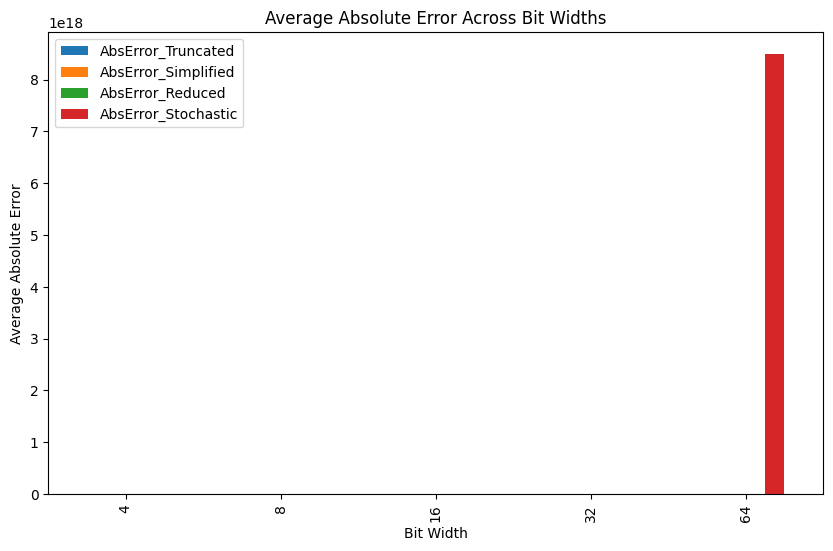

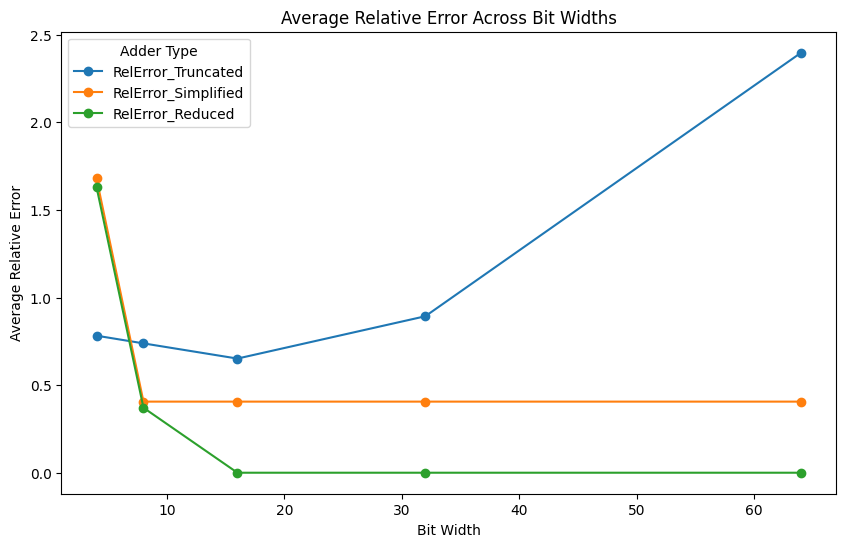

In [32]:
import matplotlib.pyplot as plt

df = pd.read_csv("evaluation_results_bit_widths.csv")

# Group by bit width and compute average errors
avg_errors = df.groupby("BitWidth")[["AbsError_Truncated", "AbsError_Simplified", "AbsError_Reduced", "AbsError_Stochastic"]].mean()
# avg_errors = df.groupby("BitWidth")[["AbsError_Truncated", "AbsError_Simplified", "AbsError_Reduced"]].mean()

# abs er vs bit width
avg_errors.plot(kind="bar", figsize=(10, 6))
plt.title("Average Absolute Error Across Bit Widths")
plt.ylabel("Average Absolute Error")
plt.xlabel("Bit Width")
plt.show()

# relative er vs bit width
# rel_errors = df.groupby("BitWidth")[["RelError_Truncated", "RelError_Simplified", "RelError_Reduced", "RelError_Stochastic"]].mean()
rel_errors = df.groupby("BitWidth")[["RelError_Truncated", "RelError_Simplified", "RelError_Reduced"]].mean()

rel_errors.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Average Relative Error Across Bit Widths")
plt.ylabel("Average Relative Error")
plt.xlabel("Bit Width")
plt.legend(title="Adder Type")
plt.show()


Evaluating error for truncated adder...
Evaluating error for simplified adder...
Evaluating error for reduced adder...
Evaluating error for stochastic adder...
Error evaluation results saved to 'evaluation_error_results.csv'


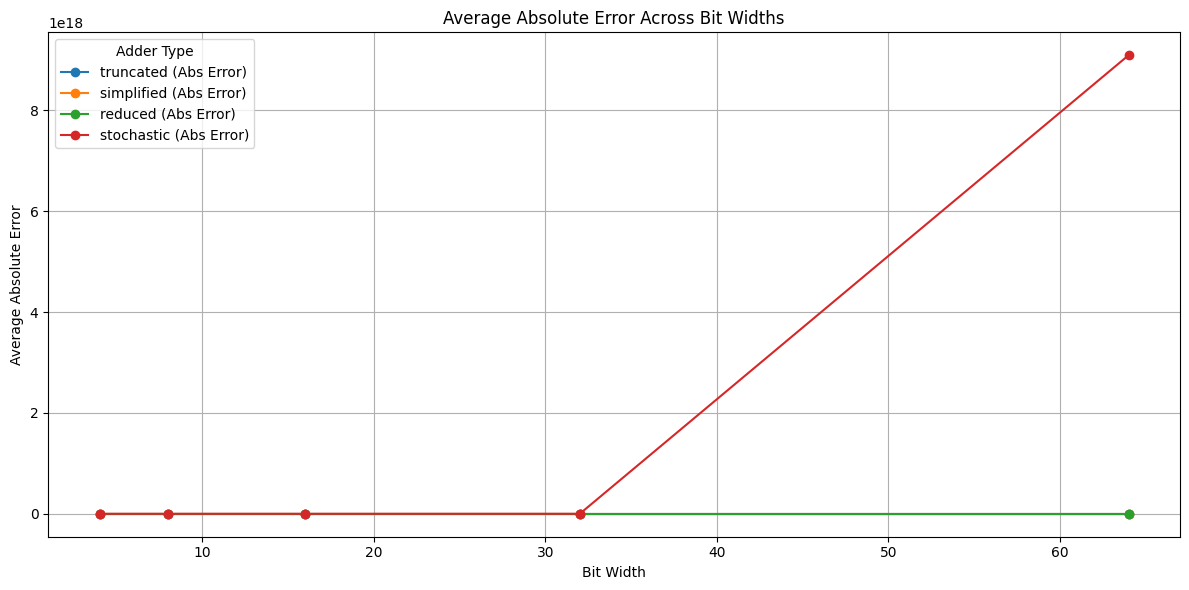

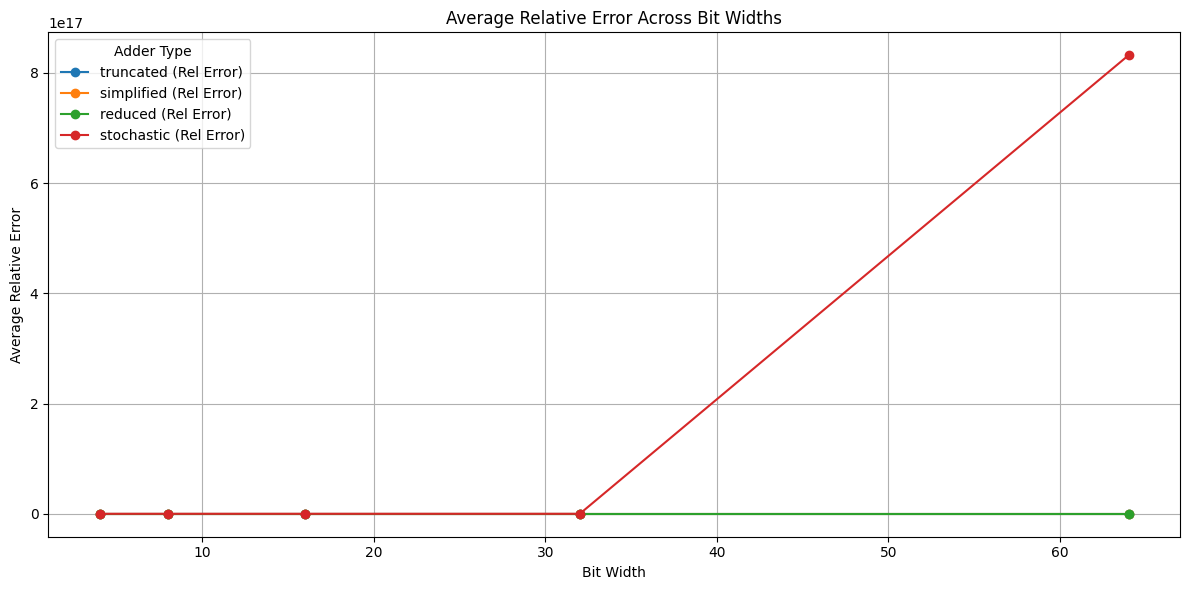

In [41]:
# improved testbench

import pandas as pd
import matplotlib.pyplot as plt

class EvaluationTestbench(Component):
    def construct(s, nbits=8, adder_type="exact"):
        BitsN = mk_bits(nbits)

        # Define inputs and outputs
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.sum = OutPort(BitsN)

        # Instantiate the selected adder
        if adder_type == "exact":
            s.adder = RippleCarryAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.cin //= Bits1(0)
            s.adder.sum //= s.sum

        elif adder_type == "truncated":
            s.adder = TruncatedAdder(nbits, truncate_bits=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum

        elif adder_type == "simplified":
            s.adder = SimplifiedLogicAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum

        elif adder_type == "reduced":
            s.adder = ReducedCarryAdder(nbits, carry_limit=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum

        elif adder_type == "stochastic":
            s.adder = StochasticAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum


def run_evaluation_testbench(bit_widths, input_range):
    results = []

    for adder_type in ["truncated", "simplified", "reduced", "stochastic"]:
        print(f"Evaluating error for {adder_type} adder...")
        for nbits in bit_widths:
            BitsN = mk_bits(nbits)
            exact_tb = EvaluationTestbench(nbits=nbits, adder_type="exact")
            approx_tb = EvaluationTestbench(nbits=nbits, adder_type=adder_type)

            # Apply passes
            exact_tb.apply(DefaultPassGroup())
            approx_tb.apply(DefaultPassGroup())
            exact_tb.sim_reset()
            approx_tb.sim_reset()

            total_abs_error = 0
            total_rel_error = 0
            num_samples = 0

            for a_val in range(input_range):
                for b_val in range(input_range):
                    # Apply inputs
                    exact_tb.a @= BitsN(a_val)
                    exact_tb.b @= BitsN(b_val)
                    approx_tb.a @= BitsN(a_val)
                    approx_tb.b @= BitsN(b_val)

                    # Tick simulation
                    exact_tb.sim_tick()
                    approx_tb.sim_tick()

                    # Collect outputs
                    exact_sum = int(exact_tb.sum)
                    approx_sum = int(approx_tb.sum)

                    # Calculate errors
                    abs_error = abs(exact_sum - approx_sum)
                    rel_error = abs_error / max(abs(exact_sum), 1)

                    total_abs_error += abs_error
                    total_rel_error += rel_error
                    num_samples += 1

            # Average errors
            avg_abs_error = total_abs_error / num_samples
            avg_rel_error = total_rel_error / num_samples

            # Save results
            results.append({
                "BitWidth": nbits,
                "AdderType": adder_type,
                "AvgAbsError": avg_abs_error,
                "AvgRelError": avg_rel_error
            })

    # Save results to CSV
    df = pd.DataFrame(results)
    df.to_csv("evaluation_error_results.csv", index=False)
    print("Error evaluation results saved to 'evaluation_error_results.csv'")

    return df


def plot_evaluation_results(csv_file):
    df = pd.read_csv(csv_file)

    # Plot absolute errors
    plt.figure(figsize=(12, 6))
    for adder_type in df["AdderType"].unique():
        adder_data = df[df["AdderType"] == adder_type]
        plt.plot(adder_data["BitWidth"], adder_data["AvgAbsError"], marker="o", label=f"{adder_type} (Abs Error)")
    plt.title("Average Absolute Error Across Bit Widths")
    plt.xlabel("Bit Width")
    plt.ylabel("Average Absolute Error")
    plt.legend(title="Adder Type")
    plt.grid()
    plt.tight_layout()
    plt.savefig("absolute_error_plot.png")
    plt.show()

    # Plot relative errors
    plt.figure(figsize=(12, 6))
    for adder_type in df["AdderType"].unique():
        adder_data = df[df["AdderType"] == adder_type]
        plt.plot(adder_data["BitWidth"], adder_data["AvgRelError"], marker="o", label=f"{adder_type} (Rel Error)")
    plt.title("Average Relative Error Across Bit Widths")
    plt.xlabel("Bit Width")
    plt.ylabel("Average Relative Error")
    plt.legend(title="Adder Type")
    plt.grid()
    plt.tight_layout()
    plt.savefig("relative_error_plot.png")
    plt.show()


# Run the Testbench
if __name__ == "__main__":
    bit_widths = [4, 8, 16, 32, 64]  # Define bit widths
    input_range = 16  # Define input range for testing
    df = run_evaluation_testbench(bit_widths, input_range)
    plot_evaluation_results("evaluation_error_results.csv")

Evaluating error for truncated adder...
Evaluating error for simplified adder...
Evaluating error for reduced adder...
Error evaluation results saved to 'evaluation_error_results.csv'


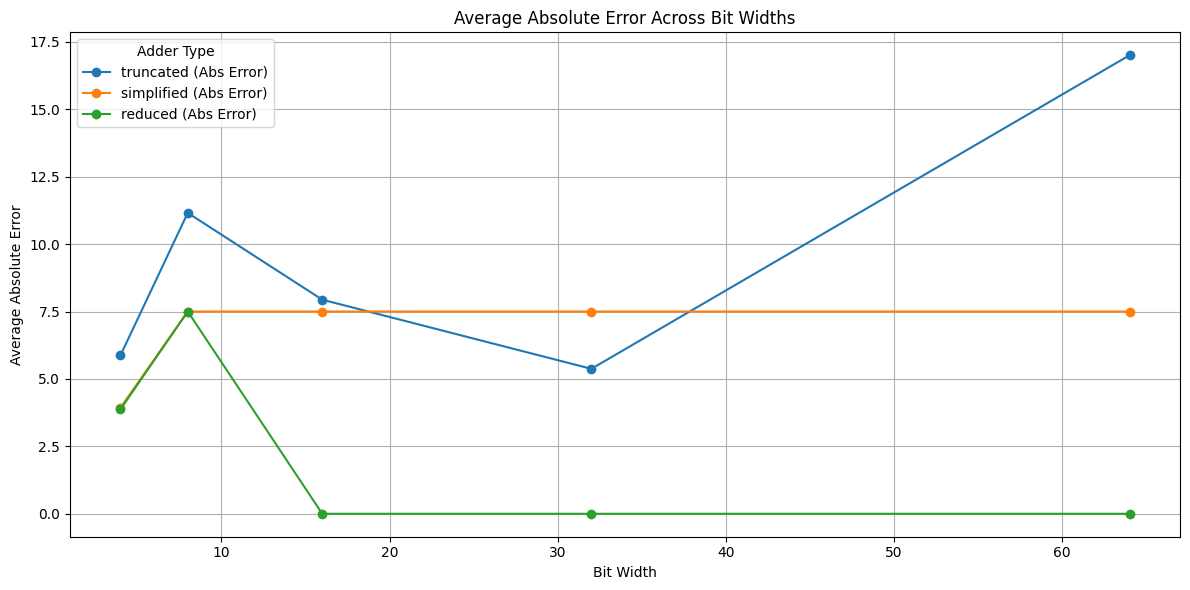

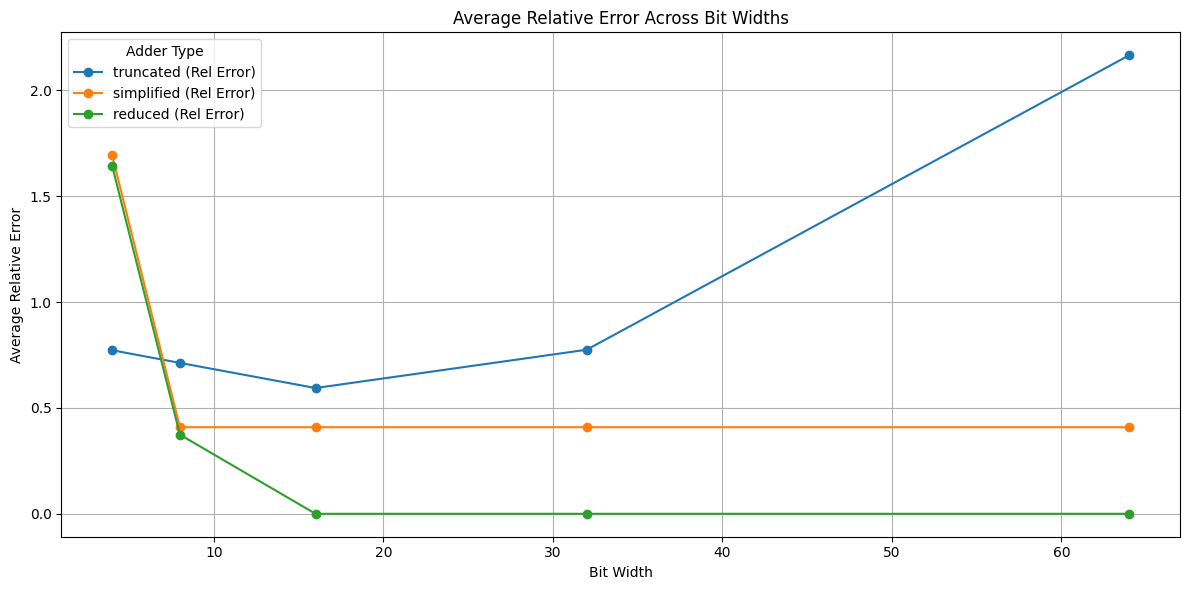

In [42]:
# improved testbench (scaled results)

import pandas as pd
import matplotlib.pyplot as plt

class EvaluationTestbench(Component):
    def construct(s, nbits=8, adder_type="exact"):
        BitsN = mk_bits(nbits)

        # Define inputs and outputs
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)
        s.sum = OutPort(BitsN)

        # Instantiate the selected adder
        if adder_type == "exact":
            s.adder = RippleCarryAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.cin //= Bits1(0)
            s.adder.sum //= s.sum

        elif adder_type == "truncated":
            s.adder = TruncatedAdder(nbits, truncate_bits=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum

        elif adder_type == "simplified":
            s.adder = SimplifiedLogicAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum

        elif adder_type == "reduced":
            s.adder = ReducedCarryAdder(nbits, carry_limit=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum

        elif adder_type == "stochastic":
            s.adder = StochasticAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.sum //= s.sum


def run_evaluation_testbench(bit_widths, input_range):
    results = []

    for adder_type in ["truncated", "simplified", "reduced"]:
        print(f"Evaluating error for {adder_type} adder...")
        for nbits in bit_widths:
            BitsN = mk_bits(nbits)
            exact_tb = EvaluationTestbench(nbits=nbits, adder_type="exact")
            approx_tb = EvaluationTestbench(nbits=nbits, adder_type=adder_type)

            # Apply passes
            exact_tb.apply(DefaultPassGroup())
            approx_tb.apply(DefaultPassGroup())
            exact_tb.sim_reset()
            approx_tb.sim_reset()

            total_abs_error = 0
            total_rel_error = 0
            num_samples = 0

            for a_val in range(input_range):
                for b_val in range(input_range):
                    # Apply inputs
                    exact_tb.a @= BitsN(a_val)
                    exact_tb.b @= BitsN(b_val)
                    approx_tb.a @= BitsN(a_val)
                    approx_tb.b @= BitsN(b_val)

                    # Tick simulation
                    exact_tb.sim_tick()
                    approx_tb.sim_tick()

                    # Collect outputs
                    exact_sum = int(exact_tb.sum)
                    approx_sum = int(approx_tb.sum)

                    # Calculate errors
                    abs_error = abs(exact_sum - approx_sum)
                    rel_error = abs_error / max(abs(exact_sum), 1)

                    total_abs_error += abs_error
                    total_rel_error += rel_error
                    num_samples += 1

            # Average errors
            avg_abs_error = total_abs_error / num_samples
            avg_rel_error = total_rel_error / num_samples

            # Save results
            results.append({
                "BitWidth": nbits,
                "AdderType": adder_type,
                "AvgAbsError": avg_abs_error,
                "AvgRelError": avg_rel_error
            })

    # Save results to CSV
    df = pd.DataFrame(results)
    df.to_csv("evaluation_error_results.csv", index=False)
    print("Error evaluation results saved to 'evaluation_error_results.csv'")

    return df


def plot_evaluation_results(csv_file):
    df = pd.read_csv(csv_file)

    # Plot absolute errors
    plt.figure(figsize=(12, 6))
    for adder_type in df["AdderType"].unique():
        adder_data = df[df["AdderType"] == adder_type]
        plt.plot(adder_data["BitWidth"], adder_data["AvgAbsError"], marker="o", label=f"{adder_type} (Abs Error)")
    plt.title("Average Absolute Error Across Bit Widths")
    plt.xlabel("Bit Width")
    plt.ylabel("Average Absolute Error")
    plt.legend(title="Adder Type")
    plt.grid()
    plt.tight_layout()
    plt.savefig("absolute_error_plot.png")
    plt.show()

    # Plot relative errors
    plt.figure(figsize=(12, 6))
    for adder_type in df["AdderType"].unique():
        adder_data = df[df["AdderType"] == adder_type]
        plt.plot(adder_data["BitWidth"], adder_data["AvgRelError"], marker="o", label=f"{adder_type} (Rel Error)")
    plt.title("Average Relative Error Across Bit Widths")
    plt.xlabel("Bit Width")
    plt.ylabel("Average Relative Error")
    plt.legend(title="Adder Type")
    plt.grid()
    plt.tight_layout()
    plt.savefig("relative_error_plot.png")
    plt.show()


# Run the Testbench
if __name__ == "__main__":
    bit_widths = [4, 8, 16, 32, 64]  # Define bit widths
    input_range = 16  # Define input range for testing
    df = run_evaluation_testbench(bit_widths, input_range)
    plot_evaluation_results("evaluation_error_results.csv")

Measuring execution time for exact adder...
Measuring execution time for truncated adder...
Measuring execution time for simplified adder...
Measuring execution time for reduced adder...
Measuring execution time for stochastic adder...
Execution time results saved to 'execution_time_independent_results.csv'


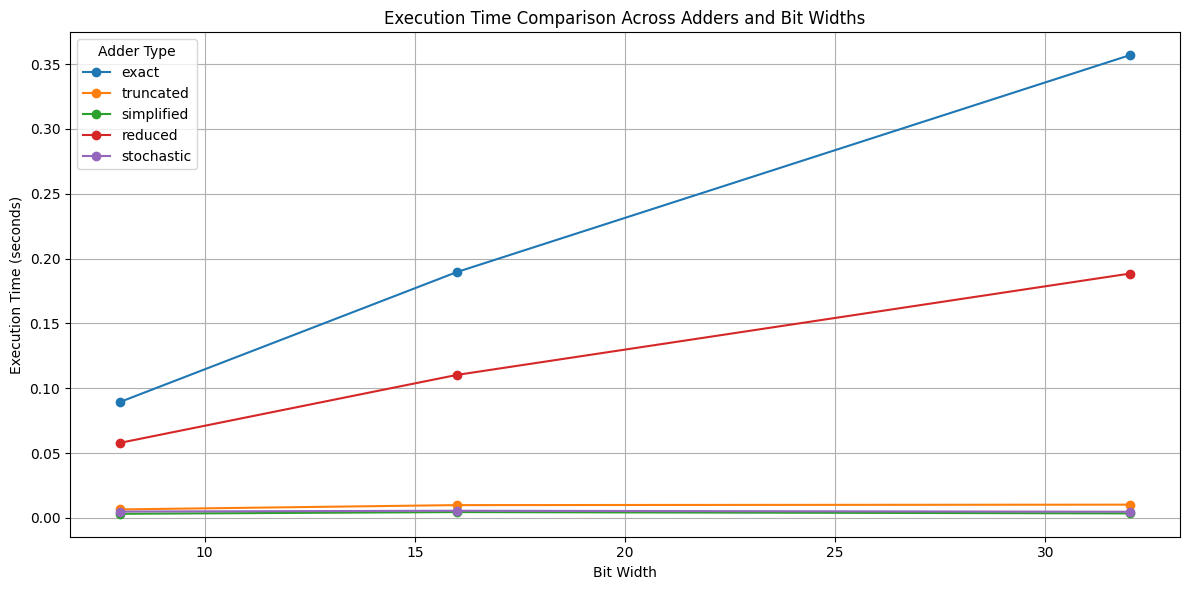

In [48]:
import time
import pandas as pd
import matplotlib.pyplot as plt

class IndependentExecutionTimeTestbench(Component):
    def construct(s, nbits=8, adder_type="exact"):
        BitsN = mk_bits(nbits)

        # Define inputs
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)

        # Instantiate selected adder
        if adder_type == "exact":
            s.adder = RippleCarryAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.cin //= Bits1(0)

        elif adder_type == "truncated":
            s.adder = TruncatedAdder(nbits, truncate_bits=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b

        elif adder_type == "simplified":
            s.adder = SimplifiedLogicAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b

        elif adder_type == "reduced":
            s.adder = ReducedCarryAdder(nbits, carry_limit=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b

        elif adder_type == "stochastic":
            s.adder = StochasticAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b

# Execution Time Measurement Function
def run_independent_execution_time_testbench(bit_widths, input_range):
    results = []

    for adder_type in ["exact", "truncated", "simplified", "reduced", "stochastic"]:
        print(f"Measuring execution time for {adder_type} adder...")
        for nbits in bit_widths:
            BitsN = mk_bits(nbits)
            tb = IndependentExecutionTimeTestbench(nbits=nbits, adder_type=adder_type)
            tb.apply(DefaultPassGroup())
            tb.sim_reset()

            start_time = time.time()  # Start timing

            for a_val in range(input_range):
                for b_val in range(input_range):
                    tb.a @= BitsN(a_val)
                    tb.b @= BitsN(b_val)
                    tb.sim_tick()

            end_time = time.time()  # End timing
            execution_time = end_time - start_time

            # Save results
            results.append({
                "BitWidth": nbits,
                "AdderType": adder_type,
                "ExecutionTime": execution_time
            })

    # Save results to CSV
    df = pd.DataFrame(results)
    df.to_csv("execution_time_independent_results.csv", index=False)
    print("Execution time results saved to 'execution_time_independent_results.csv'")

    return df

# Visualization Function
def plot_independent_execution_time_results(csv_file):
    df = pd.read_csv(csv_file)

    plt.figure(figsize=(12, 6))
    for adder_type in df["AdderType"].unique():
        adder_data = df[df["AdderType"] == adder_type]
        plt.plot(adder_data["BitWidth"], adder_data["ExecutionTime"], marker="o", label=adder_type)

    plt.title("Execution Time Comparison Across Adders and Bit Widths")
    plt.xlabel("Bit Width")
    plt.ylabel("Execution Time (seconds)")
    plt.legend(title="Adder Type")
    plt.grid()
    plt.tight_layout()
    plt.savefig("independent_execution_time_comparison.png")
    plt.show()

# Run the Testbench
if __name__ == "__main__":
    bit_widths = [8, 16, 32]  # Define the bit widths
    input_range = 16  # Define the range of inputs for testing
    df = run_independent_execution_time_testbench(bit_widths, input_range)
    plot_independent_execution_time_results("execution_time_independent_results.csv")


Measuring execution time for truncated adder...
Measuring execution time for simplified adder...
Measuring execution time for stochastic adder...
Execution time results saved to 'execution_time_independent_results.csv'


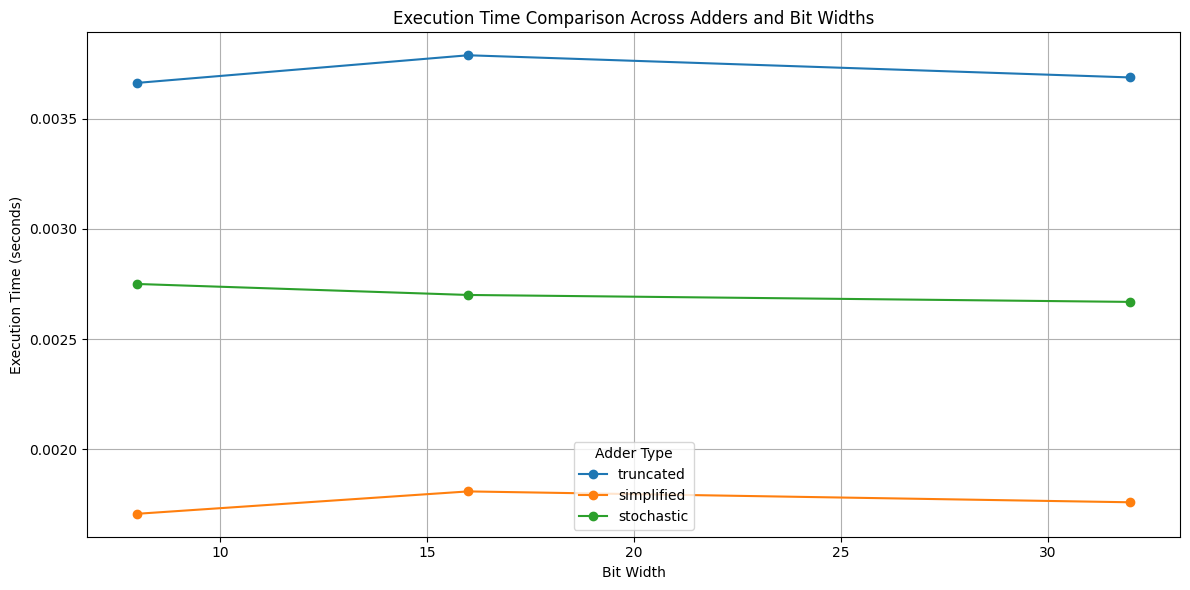

In [50]:
# scaled

class IndependentExecutionTimeTestbench(Component):
    def construct(s, nbits=8, adder_type="exact"):
        BitsN = mk_bits(nbits)

        # Define inputs
        s.a = InPort(BitsN)
        s.b = InPort(BitsN)

        # Instantiate selected adder
        if adder_type == "exact":
            s.adder = RippleCarryAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b
            s.adder.cin //= Bits1(0)

        elif adder_type == "truncated":
            s.adder = TruncatedAdder(nbits, truncate_bits=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b

        elif adder_type == "simplified":
            s.adder = SimplifiedLogicAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b

        elif adder_type == "reduced":
            s.adder = ReducedCarryAdder(nbits, carry_limit=nbits // 2)
            s.adder.a //= s.a
            s.adder.b //= s.b

        elif adder_type == "stochastic":
            s.adder = StochasticAdder(nbits)
            s.adder.a //= s.a
            s.adder.b //= s.b

# Execution Time Measurement Function
def run_independent_execution_time_testbench(bit_widths, input_range):
    results = []

    for adder_type in ["truncated", "simplified", "stochastic"]:
        print(f"Measuring execution time for {adder_type} adder...")
        for nbits in bit_widths:
            BitsN = mk_bits(nbits)
            tb = IndependentExecutionTimeTestbench(nbits=nbits, adder_type=adder_type)
            tb.apply(DefaultPassGroup())
            tb.sim_reset()

            start_time = time.time()  # Start timing

            for a_val in range(input_range):
                for b_val in range(input_range):
                    tb.a @= BitsN(a_val)
                    tb.b @= BitsN(b_val)
                    tb.sim_tick()

            end_time = time.time()  # End timing
            execution_time = end_time - start_time

            # Save results
            results.append({
                "BitWidth": nbits,
                "AdderType": adder_type,
                "ExecutionTime": execution_time
            })

    # Save results to CSV
    df = pd.DataFrame(results)
    df.to_csv("execution_time_independent_results.csv", index=False)
    print("Execution time results saved to 'execution_time_independent_results.csv'")

    return df

# Visualization Function
def plot_independent_execution_time_results(csv_file):
    df = pd.read_csv(csv_file)

    plt.figure(figsize=(12, 6))
    for adder_type in df["AdderType"].unique():
        adder_data = df[df["AdderType"] == adder_type]
        plt.plot(adder_data["BitWidth"], adder_data["ExecutionTime"], marker="o", label=adder_type)

    plt.title("Execution Time Comparison Across Adders and Bit Widths")
    plt.xlabel("Bit Width")
    plt.ylabel("Execution Time (seconds)")
    plt.legend(title="Adder Type")
    plt.grid()
    plt.tight_layout()
    plt.savefig("independent_execution_time_comparison.png")
    plt.show()

# Run the Testbench
if __name__ == "__main__":
    bit_widths = [8, 16, 32]  # Define the bit widths
    input_range = 16  # Define the range of inputs for testing
    df = run_independent_execution_time_testbench(bit_widths, input_range)
    plot_independent_execution_time_results("execution_time_independent_results.csv")


In [ ]:
from pymtl3 import *
from pymtl3.passes.backends.verilog import VerilogTranslationPass

def export_verilog(design, filename):
    # Apply the Verilog Translation Pass
    design = design.apply(VerilogTranslationPass())

    # Save the translated Verilog code to a file
    with open(filename, "w") as f:
        f.write(design.verilog_code)
    print(f"Verilog file saved to {filename}")

# Example: Export RippleCarryAdder
if __name__ == "__main__":
    # Instantiate your design
    nbits = 8
    ripple_adder = RippleCarryAdder(nbits)

    # Export Verilog
    export_verilog(ripple_adder, f"RippleCarryAdder_{nbits}bit.v")